<a href="https://colab.research.google.com/github/dimpalsonawane08/Emailspamfiltering/blob/main/emailspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Name:Dimpal Pramod Sonawane***
# ***Project Name:Email Spam Filtering***

# **Importing Libraries**

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Importing Dataset**

In [4]:
from google.colab import files

# Use the GUI to upload a file
uploaded = files.upload()


Saving emailspam.zip to emailspam.zip


In [42]:
df=pd.read_csv('/content/emailspam.zip' ,encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [43]:
df.shape

(5572, 5)

# **Data Cleaning**

**As we are not having any significant information in column Unnamed: 2,Unnamed: 3,Unnamed: 4 so we can drop those columns.**

In [44]:
df1=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

**so now we are not having any null values in our dataset.**

# **Label Encoding**

In [9]:
# label spam mail as 0;  ham mail as 1;

df.loc[df['v1'] == 'spam', 'v1',] = 0
df.loc[df['v1'] == 'ham', 'v1',] = 1

In [10]:
df

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [14]:
df["v1"].value_counts()

1    4825
0     747
Name: v1, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


([<matplotlib.patches.Wedge at 0x7ccc8c119c30>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

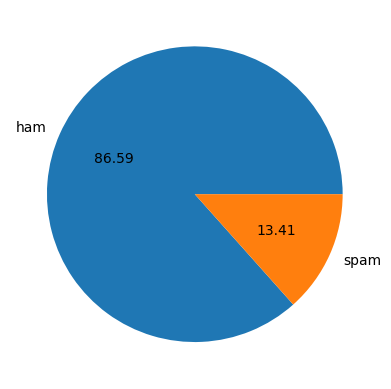

In [18]:
import matplotlib.pyplot as plt
plt.pie(df["v1"].value_counts(),labels=["ham","spam"],autopct="%0.2f")

In [19]:
#data is imbalanced
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
# number of characters
df["num_characters"]=df["v2"].apply(len)

In [22]:
df.head

<bound method NDFrame.head of      v1                                                 v2  num_characters
0     1  Go until jurong point, crazy.. Available only ...             111
1     1                      Ok lar... Joking wif u oni...              29
2     0  Free entry in 2 a wkly comp to win FA Cup fina...             155
3     1  U dun say so early hor... U c already then say...              49
4     1  Nah I don't think he goes to usf, he lives aro...              61
...  ..                                                ...             ...
5567  0  This is the 2nd time we have tried 2 contact u...             161
5568  1              Will Ì_ b going to esplanade fr home?              37
5569  1  Pity, * was in mood for that. So...any other s...              57
5570  1  The guy did some bitching but I acted like i'd...             125
5571  1                         Rofl. Its true to its name              26

[5572 rows x 3 columns]>

In [24]:
#number of words
df["num_words"]=df["v2"].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
#number of sentences
df['num_sentences']=df["v2"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df[["num_words","num_characters","num_sentences"]].describe()

,num_words,num_characters,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,18.699390,1.996411,1.996411
std,13.741932,1.520159,1.520159
min,1.000000,1.000000,1.000000
25%,9.000000,1.000000,1.000000
50%,15.000000,1.500000,1.500000
75%,27.000000,2.000000,2.000000
max,220.000000,38.000000,38.000000


In [29]:
#span
df[df["v1"]==0][["num_words","num_characters","num_sentences"]].describe()

,num_words,num_characters,num_sentences
count,747.000000,747.000000,747.000000
mean,27.891566,3.021419,3.021419
std,6.867007,1.537580,1.537580
min,2.000000,1.000000,1.000000
25%,25.000000,2.000000,2.000000
50%,29.000000,3.000000,3.000000
75%,32.000000,4.000000,4.000000
max,46.000000,9.000000,9.000000


In [31]:
#ham
df[df["v1"]==1][["num_words","num_characters","num_sentences"]].describe()

,num_words,num_characters,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,17.276269,1.837720,1.837720
std,13.988585,1.454388,1.454388
min,1.000000,1.000000,1.000000
25%,8.000000,1.000000,1.000000
50%,13.000000,1.000000,1.000000
75%,22.000000,2.000000,2.000000
max,220.000000,38.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

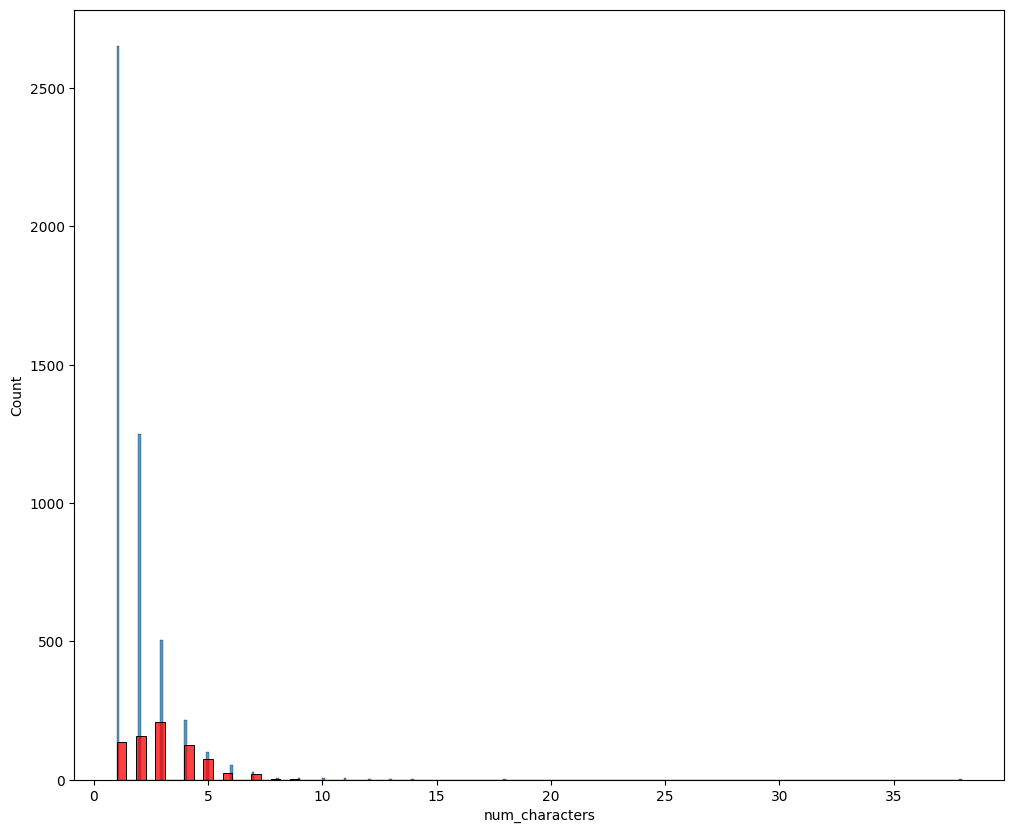

In [34]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.histplot(df[df["v1"]==1]["num_characters"])
sns.histplot(df[df["v1"]==0]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

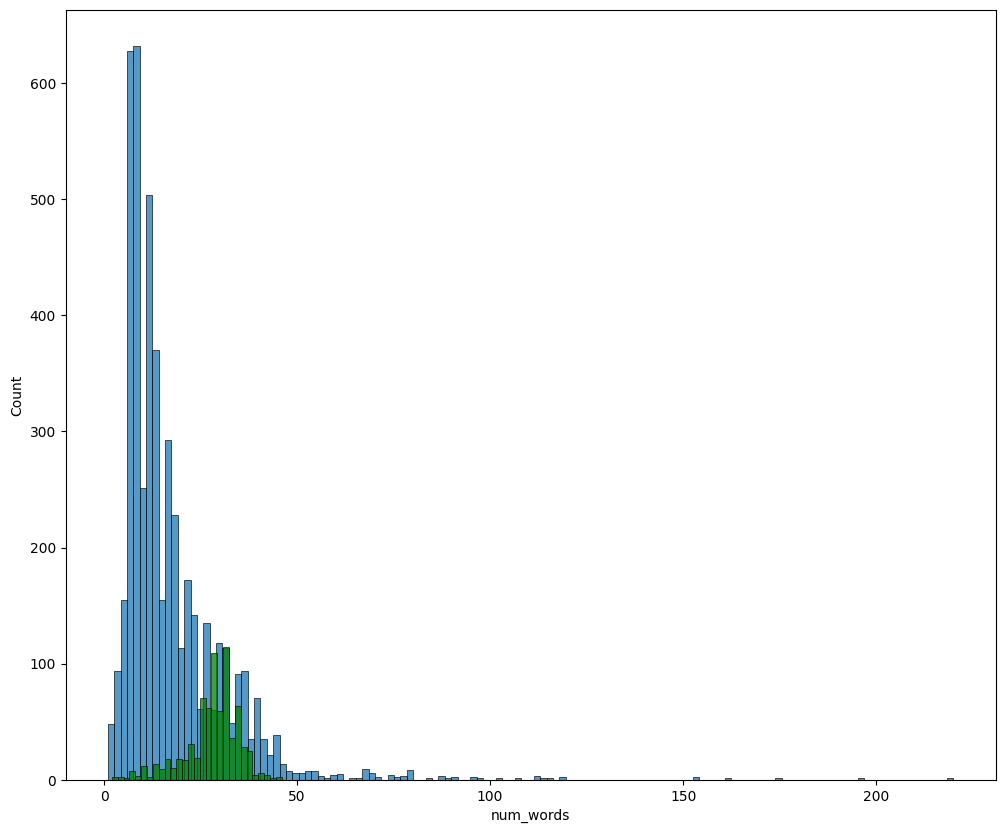

In [35]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.histplot(df[df["v1"]==1]["num_words"])
sns.histplot(df[df["v1"]==0]["num_words"],color="green")

<Axes: xlabel='num_words', ylabel='Count'>

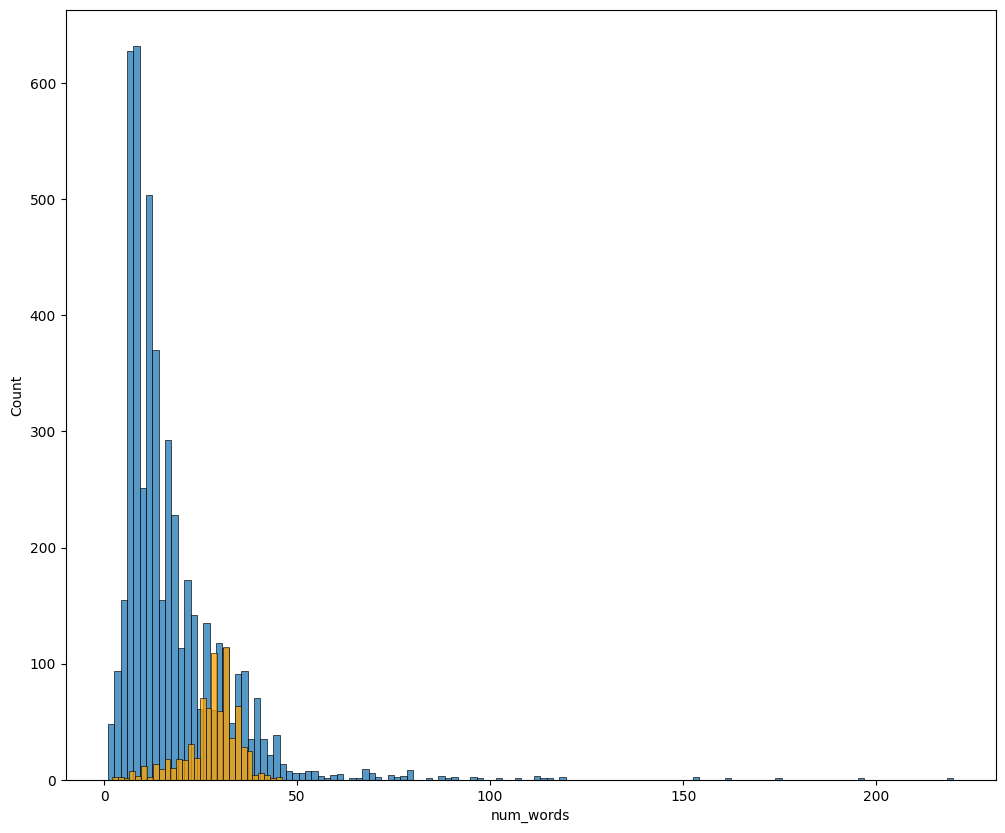

In [36]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.histplot(df[df["v1"]==1]["num_words"])
sns.histplot(df[df["v1"]==0]["num_words"],color="orange")

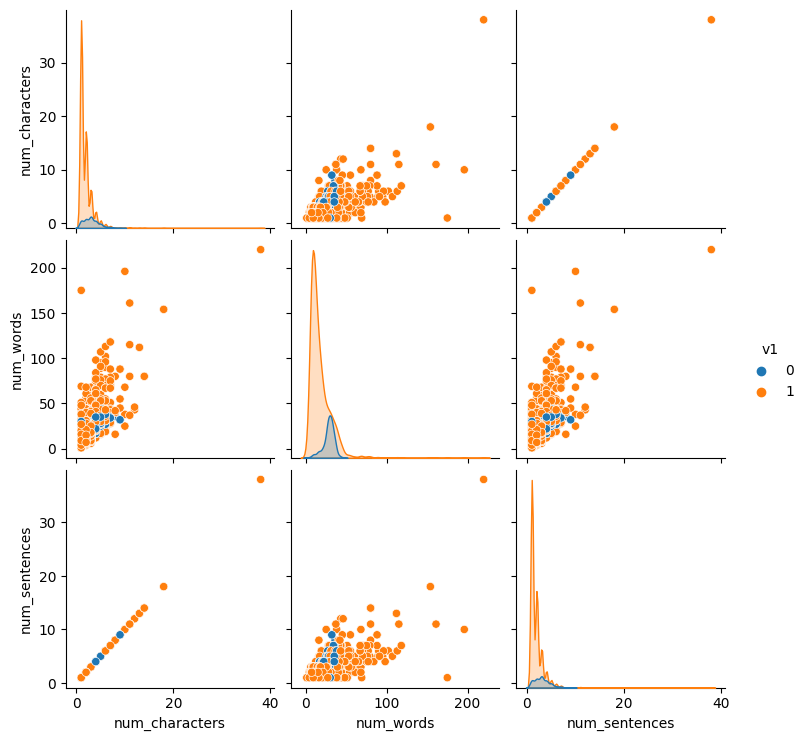

In [38]:
sns.pairplot(df,hue="v1")

<Axes: >

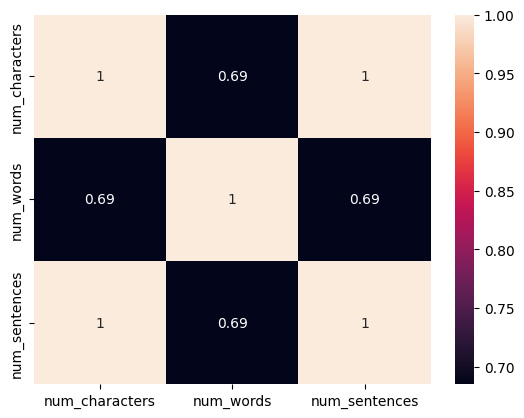

In [39]:
sns.heatmap(df.corr(),annot=True)

# **Seperate the data as feature and Target**

In [ ]:
from os import X_OK
x= df['v2']

y = df['v1']

In [ ]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [ ]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object

# **Splitting the data into train and test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)


# **Feature Extraction**

In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english')

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [ ]:
# convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')


In [ ]:
print(x_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: v2, Length: 4457, dtype: object


In [ ]:
print(x_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

# **Building the Model**

# **Logistic regression**

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression model with the training data
model.fit(x_train_features, y_train)

LogisticRegression()

# **Evaluating the trained model**

In [ ]:
# prediction on training data

prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data)


Accuracy on training data :  0.9661207089970832


# **Building a Predictive System**

In [ ]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


# **conclusion :**


**so we have got the final model for detecting the spam email with the accuracy 96.61%**